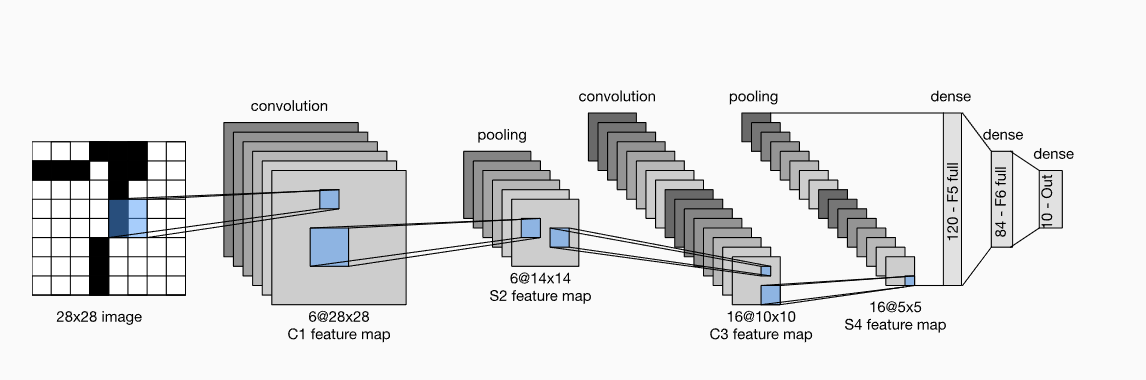

# **Importing Libraries**

# **LeNet -5 Architecture**

- LeNet5 is one of the applications of the Convolution Neural Network. Yann LeCun developed it in 1989.
- LeNet5 is a network made up of 7 layers. It consists of 3 convolution layers, two subsampling layers, and two fully connected layers.

In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ** Loading fashion-MNIST dataset from keras**

In [3]:
(train_images, y_train), (test_images, y_test) = fashion_mnist.load_data()

In [4]:
print('=================  Train Data ===================')
print(f'Grayscale train images data size :{train_images.shape}')
print(f'Grayscale train labels data size : {y_train.shape}')
print()
print('=================  Test Data ====================')
print(f'Grayscale test images data size  : {test_images.shape}')
print(f'Grayscale test labels data  size :{y_test.shape}')

=================  Train Data ===================
Grayscale train images data size :(60000, 28, 28)
Grayscale train labels data size : (60000,)

=================  Test Data ====================
Grayscale test images data size  : (10000, 28, 28)
Grayscale test labels data  size :(10000,)


In [5]:
label_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt','Sneaker','Bag','AnkleBoot']
num_classes = len(label_name)
num_classes

10

# **Normalization**

In [6]:
x_train =train_images/255.0
x_test = test_images/255.0

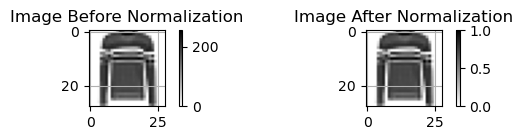

In [7]:
plt.figure(figsize=(6,1.5))
plt.subplot(1,2,1)
plt.imshow(train_images[5], cmap =plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.title('Image Before Normalization')

plt.subplot(1,2,2)
plt.imshow(x_train[5], cmap =plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.title('Image After Normalization')
plt.tight_layout()
plt.show()

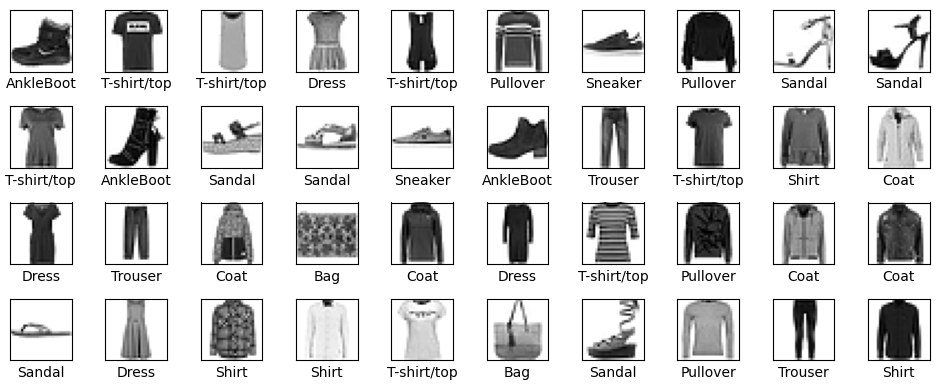

In [8]:
# Visualising array of pictures
plt.figure(figsize=(10,4))
for i in range(40):
  plt.subplot(4,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap =plt.cm.binary)
  plt.xlabel(label_name[y_train[i]])
  plt.tight_layout()
plt.show()

In [9]:
! pip install visualkeras
import visualkeras

In [10]:
def plot_example(X, y, y_pred=None):

    fig, axes = plt.subplots(3, 5)
    fig.subplots_adjust(hspace=0.3, wspace=0.5)

    X, y = X[:15, ..., 0], y[:15]

    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i],  cmap =plt.cm.binary)
        #----------------------------------------------
        # Show true and predicted classes.
        if y_pred is None:
            xlabel = f"True: {y[i]}"
        else:
            xlabel = f"True: {y[i]},\nPred: {y_pred[i]}"
        #-----------------------------------------------
        ax.set_xlabel(xlabel)
    plt.show()
def plot_example_errors(X, y, y_pred):
    incorrect = (y != y_pred)

    X = X[incorrect]
    y = y[incorrect]
    y_pred = y_pred[incorrect]
    plot_example(X, y, y_pred)

## **Reshaping**

In [11]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# **LeNet-5 : (with activation function: 'tanh')**
<img src='https://files.codingninjas.in/article_images/lenet-5-cnn-architecture-9-1675824241.webp'>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

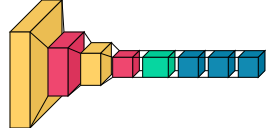

In [12]:
LeNet5  = Sequential([
    Conv2D(6, kernel_size=(5,5),  strides=1, padding='valid', activation='tanh', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Conv2D(16, kernel_size=(5,5), strides=1, padding='valid', activation='tanh'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(num_classes, activation='softmax')
])

# summary
LeNet5.summary()
print('  ','\nLeNet-5 Architecture with tanh activation Function\n')
visualkeras.layered_view(LeNet5)

In [13]:
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
LeNet5.compile(loss=loss, optimizer=optimizer,  metrics=metrics)

In [14]:
LeNet5.fit(x_train, y_train, epochs = 20, batch_size= 64, validation_data= (x_test, y_test))

Epoch 1/20
938/938 [==============================] - 14s 14ms/step - loss: 0.5375 - accuracy: 0.8057 - val_loss: 0.4098 - val_accuracy: 0.8553
Epoch 2/20
938/938 [==============================] - 13s 13ms/step - loss: 0.3626 - accuracy: 0.8680 - val_loss: 0.3534 - val_accuracy: 0.8694
Epoch 3/20
938/938 [==============================] - 13s 14ms/step - loss: 0.3192 - accuracy: 0.8835 - val_loss: 0.3277 - val_accuracy: 0.8800
Epoch 4/20
938/938 [==============================] - 12s 13ms/step - loss: 0.2917 - accuracy: 0.8928 - val_loss: 0.3189 - val_accuracy: 0.8842
Epoch 5/20
938/938 [==============================] - 13s 14ms/step - loss: 0.2724 - accuracy: 0.8996 - val_loss: 0.3157 - val_accuracy: 0.8867
Epoch 6/20
938/938 [==============================] - 13s 14ms/step - loss: 0.2561 - accuracy: 0.9049 - val_loss: 0.3072 - val_accuracy: 0.8904
Epoch 7/20
938/938 [==============================] - 13s 14ms/step - loss: 0.2413 - accuracy: 0.9116 - val_loss: 0.3174 - val_accuracy:

<Figure size 300x200 with 0 Axes>

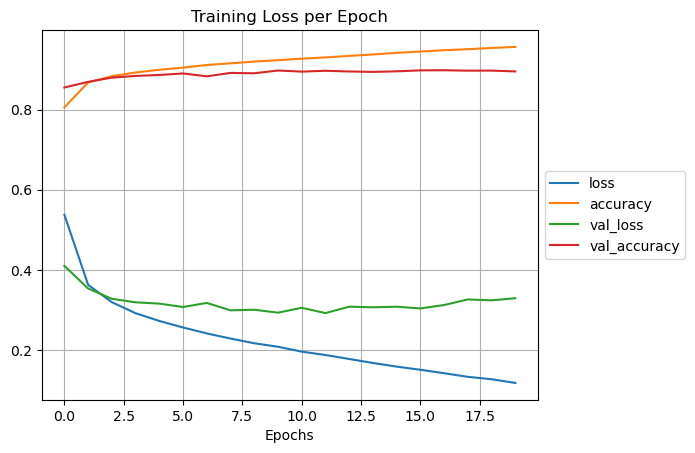

In [15]:
history_LeNet = pd.DataFrame(LeNet5.history.history)
plt.figure(figsize=(3, 2))
history_LeNet.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [16]:
predictions = LeNet5.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
print(f'Test set error rate: {np.mean(y_pred == y_test)}')


313/313 [==============================] - 2s 5ms/step
Test set error rate: 0.8955


     Some correct classification:


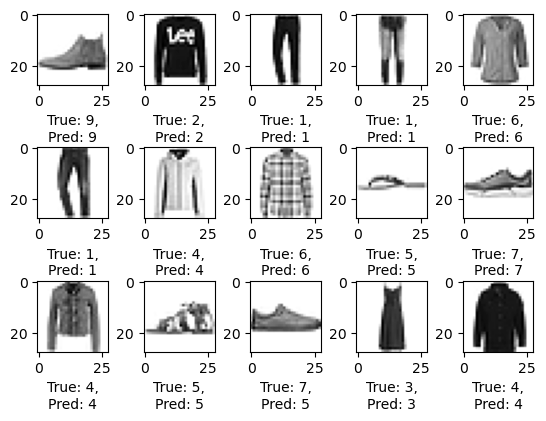

    Some incorrect classification:


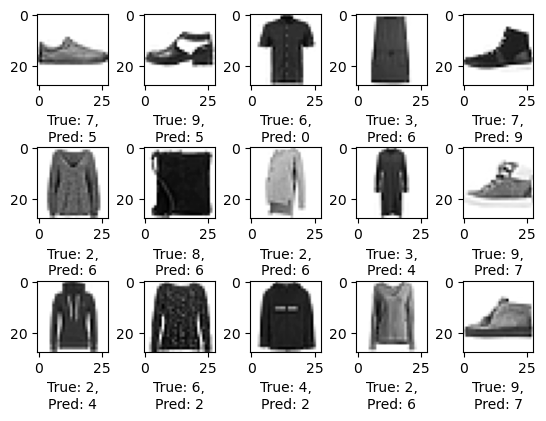

In [17]:
# Plot some examples with model predictions.
print("========"*10)
print('     Some correct classification:')
print("========"*10)
plot_example(x_test, y_test, y_pred)
print("========"*10)
print('    Some incorrect classification:')
print("========"*10)
plot_example_errors(x_test, y_test, y_pred)

# **LeNet-5 (With activation function= 'ReLu')**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

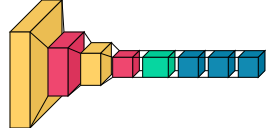

In [18]:
LeNet5_mod  = Sequential([
    Conv2D(6, kernel_size=(5,5),  strides=1, padding='valid', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Conv2D(16, kernel_size=(5,5), strides=1, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# summary
LeNet5_mod.summary()
print('  ','\nLeNet-5 Architecture with Relu activation Function\n')
visualkeras.layered_view(LeNet5_mod)

In [19]:
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
LeNet5_mod.compile(loss=loss, optimizer=optimizer,  metrics=metrics)

In [ ]:
LeNet5_mod.fit(x_train, y_train, epochs = 20, batch_size= 64, validation_data= (x_test, y_test))

Epoch 1/20
938/938 [==============================] - 16s 16ms/step - loss: 0.6172 - accuracy: 0.7723 - val_loss: 0.4721 - val_accuracy: 0.8286
Epoch 2/20
938/938 [==============================] - 13s 14ms/step - loss: 0.4095 - accuracy: 0.8505 - val_loss: 0.4048 - val_accuracy: 0.8528
Epoch 3/20
938/938 [==============================] - 13s 14ms/step - loss: 0.3484 - accuracy: 0.8719 - val_loss: 0.3606 - val_accuracy: 0.8660
Epoch 4/20
938/938 [==============================] - 14s 15ms/step - loss: 0.3180 - accuracy: 0.8829 - val_loss: 0.3332 - val_accuracy: 0.8780
Epoch 5/20
938/938 [==============================] - 14s 15ms/step - loss: 0.2967 - accuracy: 0.8899 - val_loss: 0.3297 - val_accuracy: 0.8793
Epoch 6/20
938/938 [==============================] - 13s 14ms/step - loss: 0.2797 - accuracy: 0.8968 - val_loss: 0.3178 - val_accuracy: 0.8827
Epoch 7/20
938/938 [==============================] - 13s 14ms/step - loss: 0.2626 - accuracy: 0.9017 - val_loss: 0.3642 - val_accuracy:

In [ ]:
history_LeNet5_mod = pd.DataFrame(LeNet5_mod.history.history)
plt.figure(figsize=(3, 2))
history_LeNet5_mod.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
predictions = LeNet5_mod.predict(x_test)
y_pred1 = np.argmax(predictions, axis=1)
print(f'Test set error rate: {np.mean(y_pred1 == y_test)}')

In [ ]:
# Plot some examples with model predictions.
print("========"*10)
print('     Some correct classification:')
print("========"*10)
plot_example(x_test, y_test, y_pred1)
print("========"*10)
print('    Some incorrect classification:')
print("========"*10)
plot_example_errors(x_test, y_test, y_pred1)

In [ ]:
LeNet5_mod1  = Sequential([
    Conv2D(6, kernel_size=(5,5),  strides=1, padding='valid', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Dropout(0.2),
    Conv2D(16, kernel_size=(5,5), strides=1, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Dropout(0.2),
    Flatten(),
    Dense(120, activation='relu'),
    Dropout(0.2),
    Dense(84, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# summary
LeNet5_mod1.summary()
print('  ','\nLeNet-5 Architecture with Relu activation Function\n')
visualkeras.layered_view(LeNet5_mod1)

In [ ]:
LeNet5_mod1.compile(loss=loss, optimizer=optimizer,  metrics=metrics)
LeNet5_mod1.fit(x_train, y_train, epochs = 20, batch_size= 64, validation_data= (x_test, y_test))

In [ ]:
history_LeNet5_mod1 = pd.DataFrame(LeNet5_mod1.history.history)
plt.figure(figsize=(3, 2))
history_LeNet5_mod1.plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('')
plt.title(f'Training Loss per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
predictions = LeNet5_mod1.predict(x_test)
y_pred2 = np.argmax(predictions, axis=1)
print(f'Test set error rate: {np.mean(y_pred2 == y_test)}')

In [ ]:
# Plot some examples with model predictions.
print("========"*10)
print('     Some correct classification:')
print("========"*10)
plot_example(x_test, y_test, y_pred2)
print("========"*10)
print('    Some incorrect classification:')
print("========"*10)
plot_example_errors(x_test, y_test, y_pred2)